## Identifying instances of financial excess in BPD spending 

Budget data to see how funding has shifted from 2021-2024

In [2]:
import pandas as pd
import numpy as np
operatingBudget = pd.read_csv("../data/Operating Budget/fy24-adopted-operating-budget.csv")
operatingBudget

,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.9,99314,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.3,29630,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.6,16164.36,24900,36115
...,...,...,...,...,...,...,...,...
895,Other,Housing Trust Fund,Housing Trust Fund,Other Expenses,576195.84,525404.86,618000,618000
896,Other,Reserve for Collective Bargaining City,Reserve for Collective Bargaining City,Personnel Services,14000000,52000000,36185938,76212679
897,Other,OPEB,OPEB,Other Expenses,40000000,40000000,40000000,40000000
898,Other,Risk Retention Reserve,Risk Retention Reserve,Other Expenses,2500000,3800000,2500000,2500000


In [3]:
operatingBudget['Dept'].unique()

array(["Mayor's Office", 'Election Department',
       'Intergovernmental Relations', 'Law Department',
       'Office of Equity', 'Office of Diversity',
       'Office of Resiliency & Racial Equity',
       'Office of Language & Communications Access',
       'Human Right Commission', 'Office for Immigrant Advancement',
       "Women's Advancement", 'Black Male Advancement',
       'Fair Housing & Equity', 'LGBTQ+ Advancement',
       'Commission for Persons with Disabilities',
       'Office of Police Accountability & Transparency',
       'Property Management Department', 'Public Facilities Department',
       'Inspectional Services Department', 'Neighborhood Services',
       'Office of Arts & Culture',
       'Office of Economic Opportunity & Inclusion',
       'Consumer Affairs & Licensing', 'Supplier Diversity',
       'Office of Tourism', 'Labor Compliance and Worker Protection',
       'Youth Employment and Opportunity', 'Boston Public Schools',
       'Environment Department'

In [4]:
policeBudget = operatingBudget[operatingBudget['Dept'].str.contains("Police Department")]


In [5]:
policeBudget = policeBudget.replace('#Missing', np.nan)

In [6]:
pd.options.display.float_format = '{:.0f}'.format
policeBudget['FY21 Actual Expense'] = policeBudget['FY21 Actual Expense'].astype(float)
policeBudget['FY22 Actual Expense'] = policeBudget['FY22 Actual Expense'].astype(float)
policeBudget['FY23 Appropriation'] = policeBudget['FY23 Appropriation'].astype(float)
policeBudget['FY24 Adopted'] = policeBudget['FY24 Adopted'].astype(float)


columns = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']
policeBudget[columns] = policeBudget[columns].applymap(lambda x: 0 if x < 0 else x)

The 2021 Budget is: 422917516.8999999
The 2022 Budget is: 420411576.37
The 2023 Budget is: 395907803.59999996
The 2024 Budget is: 404973192.56499994


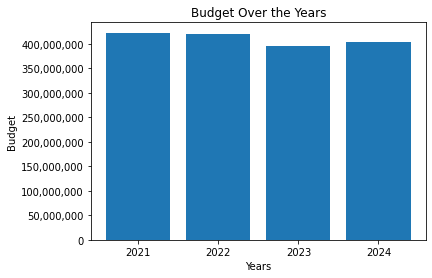

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
budget21 = policeBudget['FY21 Actual Expense'].sum()
budget22 = policeBudget['FY22 Actual Expense'].sum()
budget23 = policeBudget['FY23 Appropriation'].sum()
budget24 = policeBudget['FY24 Adopted'].sum()

print("The 2021 Budget is: " + str(budget21))

print("The 2022 Budget is: " + str(budget22))

print("The 2023 Budget is: " + str(budget23))

print("The 2024 Budget is: " + str(budget24))

def format_func(value, _):
    return f"{int(value):,}"

# Apply the formatting function to the y-axis


years = ['2021', '2022', '2023', '2024']
values = [budget21, budget22, budget23, budget24]
plt.xlabel('Years')
plt.ylabel('Budget')
plt.title('Budget Over the Years')
plt.bar(years, values)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

Text(0, 0.5, 'Annual Budget ($100,000,000)')

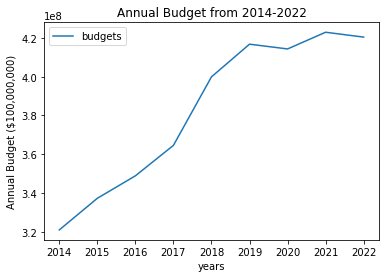

In [8]:
#No dataset for this, but information is found on boston city website
budget14 = 321000297
budget15 = 337310895
budget16 = 348887844
budget17 = 364594820
budget18 = 399924493
budget19 = 416762373
budget20 = 414306876
years = [i for i in range(2014, 2023)]
budgets = [budget14, budget15, budget16, budget17, budget18, budget19, budget20, budget21, budget22]

df = pd.DataFrame({'years': years, 'budgets': budgets})
df.plot.line(x='years', y='budgets')
plt.title('Annual Budget from 2014-2022')
plt.ylabel('Annual Budget ($100,000,000)')

In [9]:
policeBudget['Expense Category'].unique()

array(['Personnel Services', 'Contractual Services',
       'Supplies & Materials', 'Current Charges & Obligations',
       'Equipment'], dtype=object)

In [10]:
expenseByCat21 = policeBudget.groupby('Expense Category')['FY21 Actual Expense'].sum()
expenseByCat22 = policeBudget.groupby('Expense Category')['FY22 Actual Expense'].sum()
expenseByCat23 = policeBudget.groupby('Expense Category')['FY23 Appropriation'].sum()
expenseByCat24 = policeBudget.groupby('Expense Category')['FY24 Adopted'].sum()

data = [expenseByCat21, expenseByCat22, expenseByCat23, expenseByCat24]
years = ['2021', '2022', '2023', '2024']


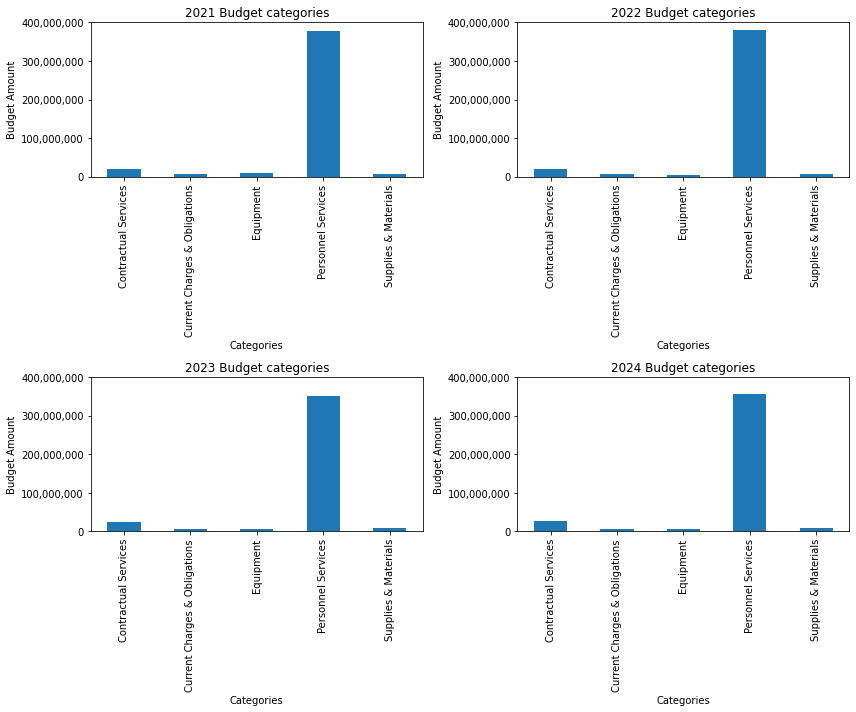

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, year in enumerate(years):
    row, col = divmod(i, 2)  # Calculate the row and column for the current subplot
    ax = axes[row, col]
    data[i].plot(kind='bar', ax=ax)
    ax.set_ylim(0,400000000)
    ax.set_ylabel('Budget Amount')
    ax.set_xlabel('Categories')
    ax.set_title(f'{year} Budget categories')
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
expenseByCat21

Expense Category
Contractual Services             20879111
Current Charges & Obligations     7870088
Equipment                        10514886
Personnel Services              376776324
Supplies & Materials              6877108
Name: FY21 Actual Expense, dtype: float64

In [13]:
contractPercent2021 = (expenseByCat21['Contractual Services'] / budget21) * 100
chargesPercent2021 = (expenseByCat21['Current Charges & Obligations'] / budget21) * 100
equipmentPercent2021 =  (expenseByCat21['Equipment'] / budget21) * 100
personnelPercent2021 =  (expenseByCat21['Personnel Services'] / budget21) * 100
suppliesPercent2021 =  (expenseByCat21['Supplies & Materials'] / budget21) * 100

print(budget21)

print(contractPercent2021 +chargesPercent2021 + equipmentPercent2021 + personnelPercent2021 + suppliesPercent2021)


contractPercent2022 = (expenseByCat22['Contractual Services'] / budget22) * 100
chargesPercent2022 = (expenseByCat22['Current Charges & Obligations'] / budget22) * 100
equipmentPercent2022 =  (expenseByCat22['Equipment'] / budget22) * 100
personnelPercent2022 =  (expenseByCat22['Personnel Services'] / budget22) * 100
suppliesPercent2022 =  (expenseByCat22['Supplies & Materials'] / budget22) * 100



contractPercent2023 = (expenseByCat23['Contractual Services'] / budget23) * 100
chargesPercent2023 = (expenseByCat23['Current Charges & Obligations'] / budget23) * 100
equipmentPercent2023 =  (expenseByCat23['Equipment'] / budget23) * 100
personnelPercent2023 =  (expenseByCat23['Personnel Services'] / budget23) * 100
suppliesPercent2023 =  (expenseByCat23['Supplies & Materials'] / budget23) * 100

contractPercent2024 = (expenseByCat24['Contractual Services'] / budget24) * 100
chargesPercent2024 = (expenseByCat24['Current Charges & Obligations'] / budget24) * 100
equipmentPercent2024 =  (expenseByCat24['Equipment'] / budget24) * 100
personnelPercent2024 =  (expenseByCat24['Personnel Services'] / budget24) * 100
suppliesPercent2024 =  (expenseByCat24['Supplies & Materials'] / budget24) * 100

years = ['2021', '2022', '2023', '2024']
charges = [chargesPercent2021, chargesPercent2022, chargesPercent2023, chargesPercent2024]
contract = [contractPercent2021, contractPercent2022, contractPercent2023, contractPercent2024]
equipment = [equipmentPercent2021, equipmentPercent2022, equipmentPercent2023, equipmentPercent2024]
personnel = [personnelPercent2021, personnelPercent2022, personnelPercent2023, personnelPercent2024]
supplies = [suppliesPercent2021, suppliesPercent2022, suppliesPercent2023, suppliesPercent2024]

422917516.8999999
100.00000000000003


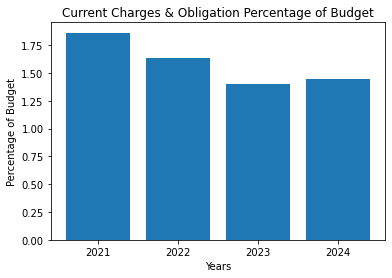

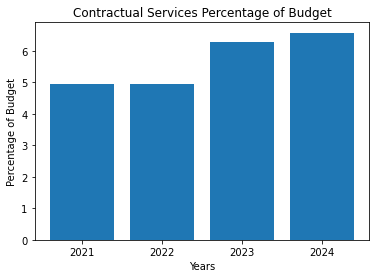

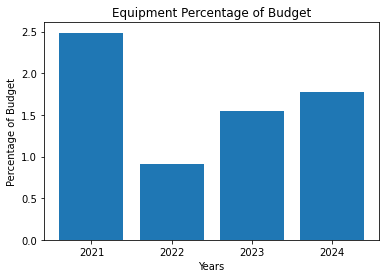

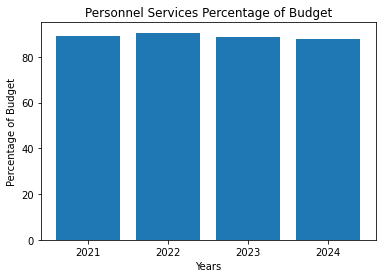

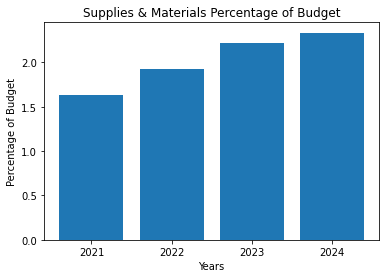

In [14]:
plt.bar(years, charges)
plt.xlabel('Years')
plt.ylabel('Percentage of Budget')
plt.title('Current Charges & Obligation Percentage of Budget')
plt.show()

plt.bar(years, contract)
plt.xlabel('Years')
plt.ylabel('Percentage of Budget')
plt.title('Contractual Services Percentage of Budget')
plt.show()

plt.bar(years, equipment)
plt.xlabel('Years')
plt.ylabel('Percentage of Budget')
plt.title('Equipment Percentage of Budget')
plt.show()

plt.bar(years, personnel)
plt.xlabel('Years')
plt.ylabel('Percentage of Budget')
plt.title('Personnel Services Percentage of Budget')
plt.show()

plt.bar(years, supplies)
plt.xlabel('Years')
plt.ylabel('Percentage of Budget')
plt.title('Supplies & Materials Percentage of Budget')
plt.show()

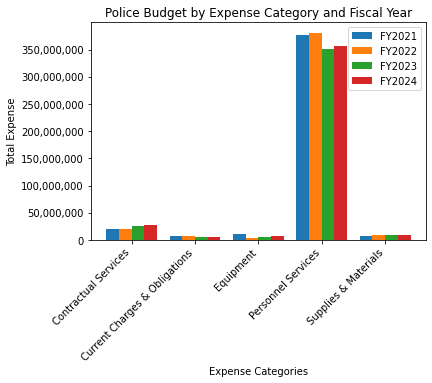

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
expenseByCat21 = policeBudget.groupby('Expense Category')['FY21 Actual Expense'].sum()
expenseByCat22 = policeBudget.groupby('Expense Category')['FY22 Actual Expense'].sum()
expenseByCat23 = policeBudget.groupby('Expense Category')['FY23 Appropriation'].sum()
expenseByCat24 = policeBudget.groupby('Expense Category')['FY24 Adopted'].sum()

data = [expenseByCat21, expenseByCat22, expenseByCat23, expenseByCat24]
years = ['2021', '2022', '2023', '2024']

# Set up the figure and axes
fig, ax = plt.subplots()

# Bar width
bar_width = 0.2

# Bar positions
# Bar positions
bar_positions = np.arange(len(expenseByCat21.index))

# Plotting the bars with different colors for each year, overlapping them
for i, year in enumerate(years):
    ax.bar(bar_positions + i * bar_width, data[i], bar_width, label=f'FY{year}')

# Set labels and title
ax.set_xlabel('Expense Categories')
ax.set_ylabel('Total Expense')
ax.set_title('Police Budget by Expense Category and Fiscal Year')
ax.set_xticks(bar_positions + 1.5 * bar_width)
ax.yaxis.set_major_formatter(FuncFormatter(format_func))
ax.set_xticklabels(expenseByCat21.index, rotation=45, ha='right')  # Adjust the rotation angle as needed

ax.set_xticklabels(expenseByCat21.index)
ax.legend()

# Show the plot
plt.show()